In [1]:
from google.colab import drive
drive.mount("/drive")
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set()

Mounted at /drive


In [ ]:
df= pd.read_csv("/drive/My Drive/name.csv",thousands=',',skipinitialspace=True)
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50 m²,30 triệu/m²,2 phòng,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,"1,5 tỷ- 50 m2đ"
1,"Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận ...",Đã bàn giao,34 m²,"52,35 triệu/m²",2 phòng,NaN,NaN,NaN,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,78 tỷ- 34 m2đ"
2,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63 m²,"26,19 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,"1,65 tỷ- 63 m2đ"
3,Tô Thị Hồng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,17 tỷ- 59 m2đ"
4,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53 m²,"30,19 triệu/m²",2 phòng,NaN,NaN,1 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,"1,6 tỷ- 53 m2đ"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            29731 non-null  object 
 1   TinhTrangBDS      27048 non-null  object 
 2   DienTich          27040 non-null  object 
 3   Gia/m2            27039 non-null  object 
 4   Phongngu          27050 non-null  object 
 5   TenPhanKhu        7542 non-null   object 
 6   SoTang            7220 non-null   float64
 7   PhongTam          26441 non-null  object 
 8   Loai              27050 non-null  object 
 9   GiayTo            20537 non-null  object 
 10  MaCanHo           3518 non-null   object 
 11  TinhTrangNoiThat  13798 non-null  object 
 12  HuongCuaChinh     10090 non-null  object 
 13  HuongBanCong      9353 non-null   object 
 14  DacDiem           5968 non-null   object 
 15  Gia               29731 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

In [ ]:
df.to_csv('/drive/My Drive/united1.csv',encoding="utf-8-sig",index=False)

In [ ]:
## Mình sẽ chỉ lấy những data có dữ liệu về diện tích 
df1 = df[df.DienTich.notnull()]
df1 = df1.reset_index()
for i in range(0,len(df1.DienTich)):
    df1.DienTich[i]= df1.DienTich[i].split(' ')[0]
## Có thể thấy 2 trường dữ liệu Gia/m2 và Gia tương đương nhau nên mình sẽ xóa trường này đi
del df1["Gia/m2"]

In [ ]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng ngủ 
df2 = df1[df1.Phongngu.notnull()]
for i in range(0,len(df2.Phongngu)):
    if 'nhiều hơn' in df2.Phongngu[i]:
        df2.Phongngu[i]= float(df2.Phongngu[i].split(' ')[2])+1
    else:
        df2.Phongngu[i]= df2.Phongngu[i].split(' ')[0]

In [ ]:
## Mình sẽ chỉ lấy những data có dữ liệu về phòng tắm
df3 = df2[df2.PhongTam.notnull()]
df3 = df3.reset_index()
for i in range(0,len(df3.PhongTam)):
    if 'Nhiều hơn' in df3.PhongTam[i]:
        df3.PhongTam[i]= float(df3.PhongTam[i].split(' ')[2])+1
    else:
        df3.PhongTam[i]= df3.PhongTam[i].split(' ')[0]
        
del df3['level_0']
del df3['index']
df4 = df3[df3.Loai.notnull()]

In [ ]:
## truc quan truong gia tri Gia

for i in range(0,len(df4.Gia)):
    
    if 'GIÁ TỐT' in df4.Gia[i]:
        df4.Gia[i] = df4.Gia[i].split('\n')[0]
    else:
        df4.Gia[i] = df4.Gia[i].split('-')[0]
    #print(df4.Gia[i])
    

In [ ]:
#chuyen string thanh gia tri thuc
for i in range(0,len(df4.Gia)):
    if 'tỷ' in df4.Gia[i]:
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000000,1)
    elif 'triệu' in df4.Gia[i] :
        price = df4.Gia[i].split(' ')[0]
        price = price.replace(',','.')
        df4.Gia[i] = round(float(price)*1000000,1)
print(len(df4.Gia))  
df4 = df4.drop([17284])
df4 = df4.reset_index()
df4.to_csv('/drive/My Drive/united2.csv',encoding="utf-8-sig",index=False)
df4
#for i in range(0,len(df4.Gia)):
#   print(df4.Gia[i])

26431


,index,DiaChi,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,1.5e+09
1,1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1.65e+09
2,2,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Đã bàn giao,53,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,1.6e+09
3,3,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Đã bàn giao,75,2,NaN,NaN,2,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,1.85e+09
4,4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Đã bàn giao,57.72,2,A,NaN,2,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1.75e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26425,26426,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Đã bàn giao,53,2,B,19.0,1,Chung cư,Đang chờ sổ,14,Hoàn thiện cơ bản,NaN,Tây Nam,NaN,2.1e+09
26426,26427,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Đã bàn giao,76,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Đông,Đông Nam,Căn góc,1.55e+09
26427,26428,"Đường Tạ Quang Bửu, Phường 5, Quận 8, Tp Hồ Ch...",Đã bàn giao,115,2,A2,NaN,2,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,3.3e+09
26428,26429,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Đã bàn giao,82,2,NaN,NaN,2,Chung cư,Đã có sổ,NaN,Nội thất đầy đủ,Đông Nam,Tây Bắc,NaN,2.65e+09


In [ ]:
df4['Quan'] = df.DiaChi.copy()
for i in range(0,len(df4.DiaChi)):
    a= df4.DiaChi[i].split(',')
    df4['Quan'][i] = a[len(a)-2]
for i in df4['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df4 = df4.drop(df4[df4['Quan']==i].index)

In [ ]:
df4.Quan.unique()

array([' Quận 9', ' Quận Bình Tân', ' Quận Thủ Đức', ' Quận 12',
       ' Quận 8', ' Quận Bình Thạnh', ' Huyện Bình Chánh', ' Quận 7',
       ' Quận Tân Bình', ' Huyện Nhà Bè', ' Quận Tân Phú', ' Quận 6',
       ' Quận 2', ' Quận 4', ' Quận Gò Vấp', ' Quận 5', ' Quận 1',
       ' Quận Phú Nhuận', ' Huyện Hóc Môn', ' Quận 10', ' Quận 3',
       ' Quận 11', ' Huyện Củ Chi'], dtype=object)

In [ ]:
frame = df4[['DiaChi','Quan','TinhTrangBDS','DienTich','Phongngu','TenPhanKhu','SoTang','PhongTam','Loai','GiayTo','MaCanHo'
             ,'TinhTrangNoiThat' ,'HuongCuaChinh','HuongBanCong','DacDiem',"Gia"]]
frame.head(2)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,50,2,NaN,NaN,1,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,1.5e+09
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Quận Bình Tân,Đã bàn giao,63,2,NaN,NaN,2,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1.65e+09


In [ ]:
frame.DienTich = frame.DienTich.astype('float')
frame.Phongngu = frame.Phongngu.astype('float') 
frame.PhongTam = frame.PhongTam.astype('float') 
frame.Gia = frame.Gia.astype('float') 
frame.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia
count,26136.000000,26136.000000,7039.000000,26136.000000,2.613600e+04
mean,218.358106,2.027127,11.330587,1.731558,2.756281e+09
std,9545.739259,0.741453,14.896840,0.610244,7.593491e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,55.000000,2.000000,5.000000,1.000000,1.600000e+09
50%,66.660000,2.000000,9.000000,2.000000,2.100000e+09
75%,78.000000,2.000000,16.000000,2.000000,3.150000e+09
max,1000000.000000,11.000000,720.000000,7.000000,9.800000e+11


In [ ]:
frame['USD'] = round(frame['Gia']/24000,0)
rows  = frame[frame.DienTich > 500]
frame = frame.drop(index = rows.index)
rows  = frame[frame.SoTang > 81]
frame = frame.drop(index = rows.index)
frame['log_price'] = np.log(frame.USD)

print("The number of row after cleaning data:",len(frame))

The number of row after cleaning data: 26068


In [ ]:
frame.to_csv('/drive/My Drive/dataclean.csv',encoding="utf-8-sig",index=False)

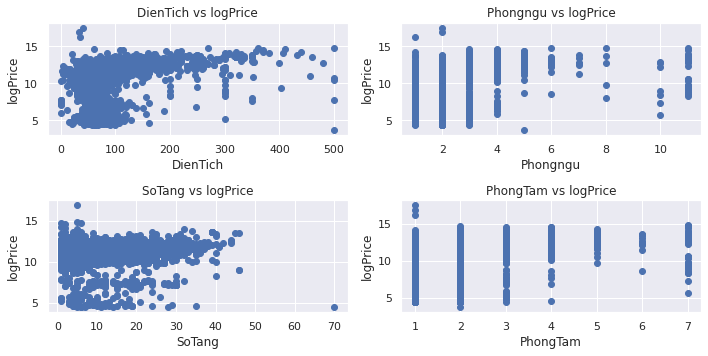

In [ ]:
#Trực quan dữ liệu
#2.1 Trực quan những giá trị dạng số
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(frame[x],frame['log_price'])
    plt.title(x+' vs logPrice')
    plt.ylabel('logPrice')
    plt.xlabel(x)


plt.figure(figsize=(10,12))

scatter('DienTich', 1)
scatter('Phongngu', 2)
scatter('SoTang', 3)
scatter('PhongTam', 4)

plt.tight_layout()


In [ ]:
#2 trường dữ liệu phòng ngủ và phòng tắm không ảnh hưởng quá nhiều tới giá

#2.2 Trực quan những giá categorical
frame1 = frame[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong'
                ,'DacDiem','Gia','USD']]
bins = [42,67917,106250,40833333]


In [ ]:
def Analyst(col):
    temp = frame1.copy()
    table = temp.groupby([col])['USD'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['low','Medium','High']
    frame1['range'] = pd.cut(temp['USD_y'],bins,right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(frame1.groupby([col,'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('house Range vs Price')
    plt.show()

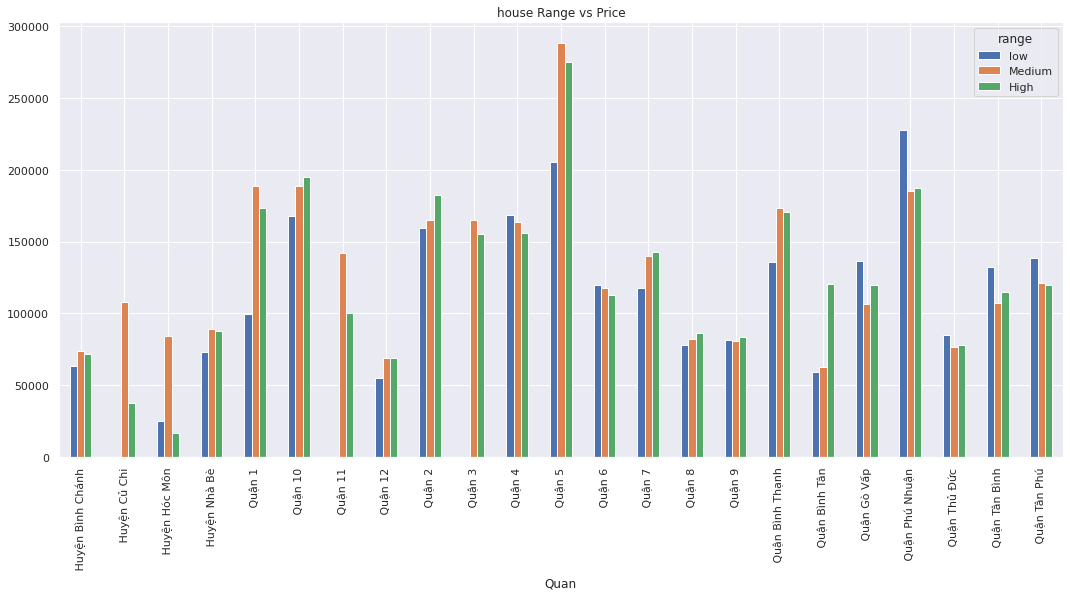

In [ ]:
Analyst('Quan')

Quận 5 , Quận 10, Quận 1 , Quận Phú Nhuận là những quận có giá chung cư cao nhất

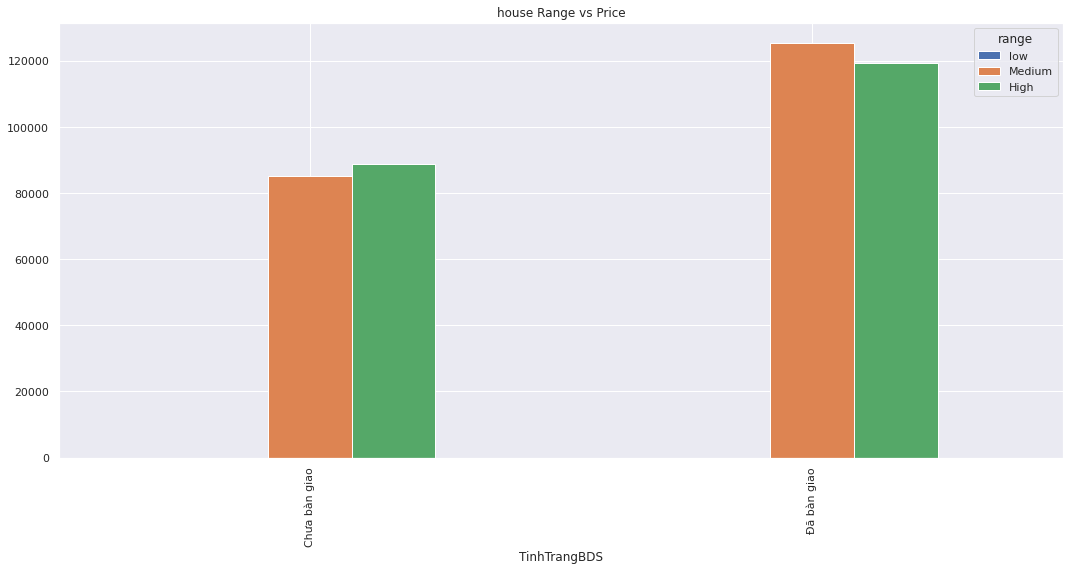

In [ ]:

Analyst('TinhTrangBDS')

Có thể thấy những chung cư đã được bàn giao có giá cao hơn so với chưa được bàn giao

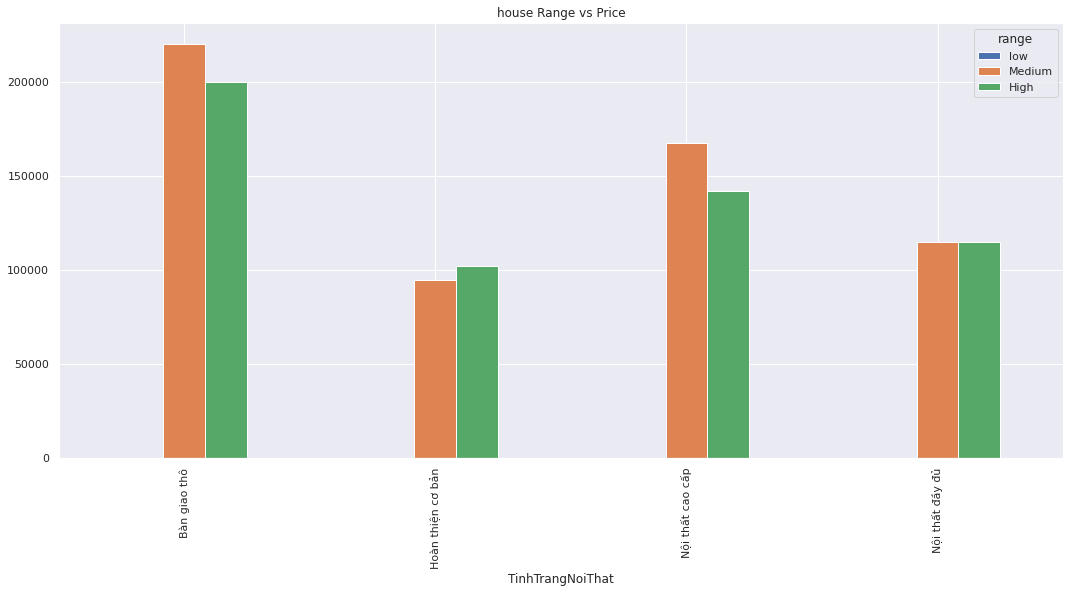

In [ ]:

Analyst('TinhTrangNoiThat')

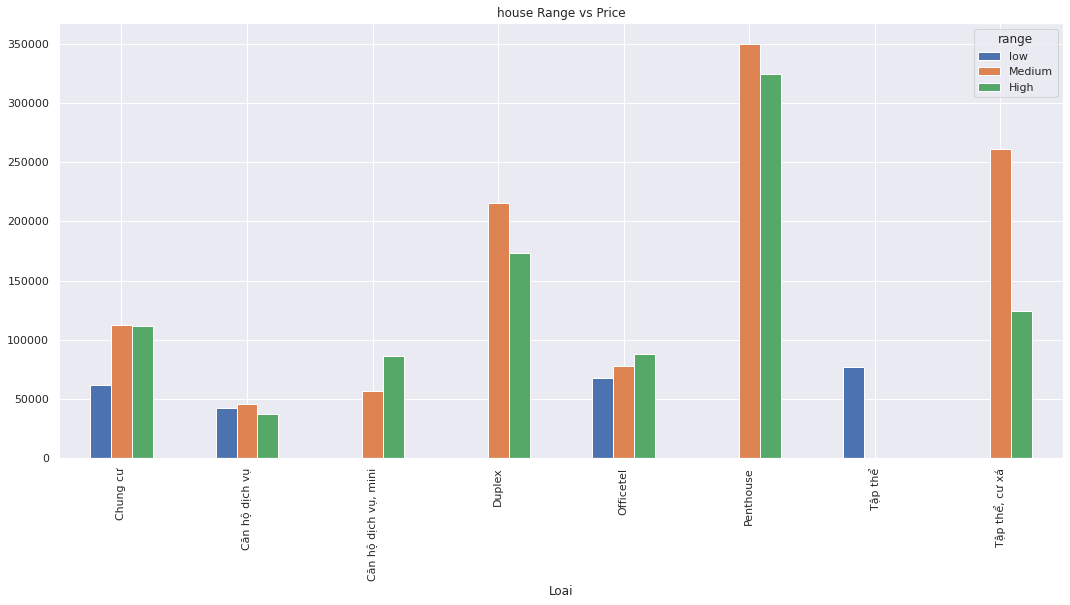

In [ ]:
Analyst('Loai')

In [ ]:

test = frame1[frame1.USD <frame1.USD.quantile(0.8)]

Đông Nam    1761
Đông         983
Tây Nam      806
Bắc          787
Đông Bắc     762
Tây Bắc      688
Tây          684
Nam          667
Name: HuongBanCong, dtype: int64


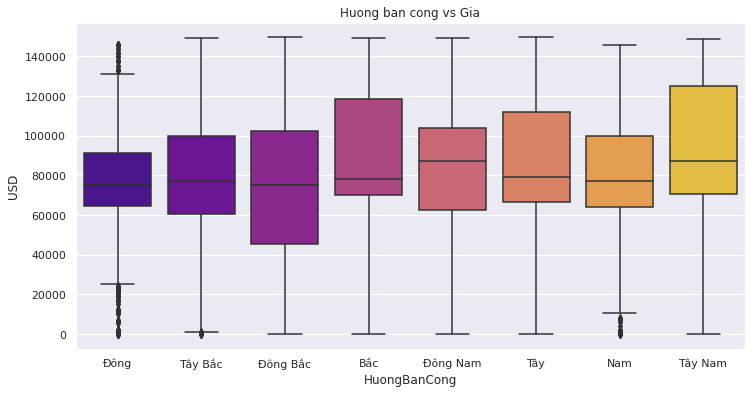

Đông Nam    1557
Tây Bắc     1309
Nam         1104
Đông Bắc    1017
Đông         875
Tây Nam      643
Tây          521
Bắc          490
Name: HuongCuaChinh, dtype: int64


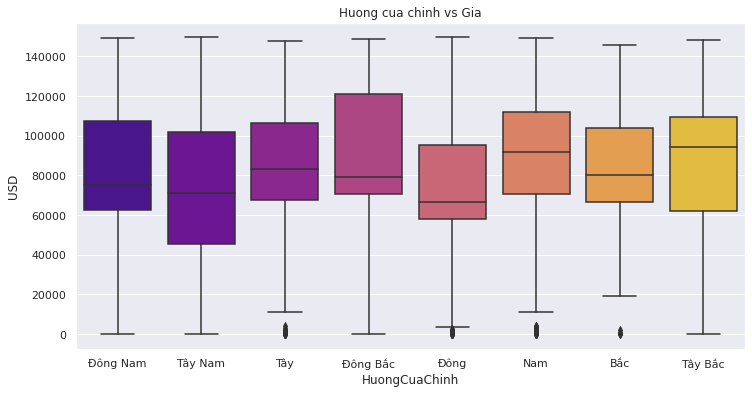

Chung cư                19346
Căn hộ dịch vụ, mini      630
Officetel                 393
Duplex                    211
Căn hộ dịch vụ            120
Penthouse                  76
Tập thể, cư xá             47
Tập thể                     2
Name: Loai, dtype: int64


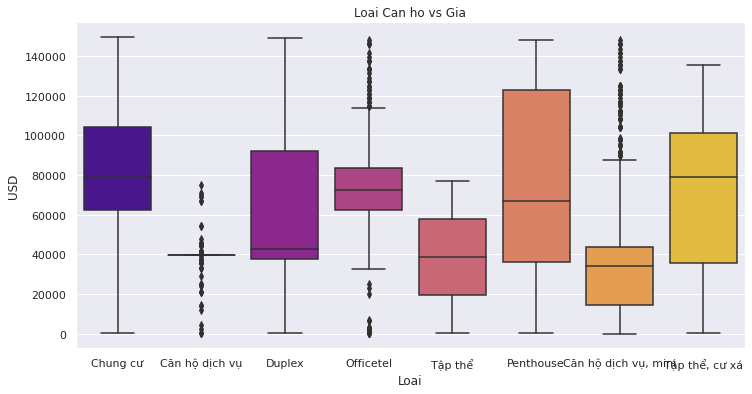

Đã có sổ        7481
Đang chờ sổ     6645
Giấy tờ khác    1701
Name: GiayTo, dtype: int64


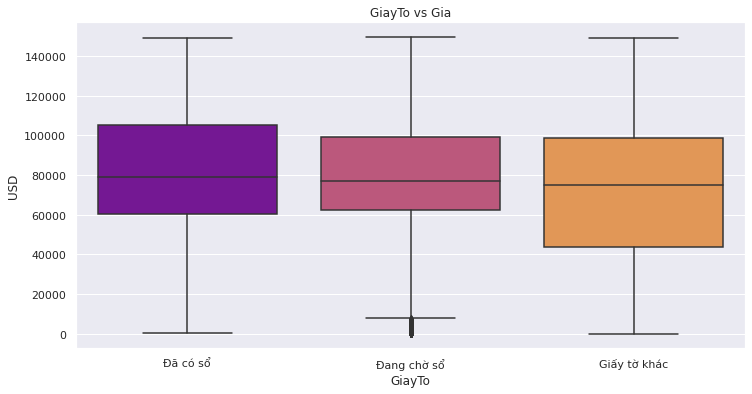

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
sns.boxplot(x=test.HuongBanCong, y=test.USD, palette=("plasma"))
plt.title('Huong ban cong vs Gia')
plt.show()

print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD, palette=("plasma"))
plt.title('Huong cua chinh vs Gia')
plt.show()

print(test.Loai.value_counts())
sns.boxplot(x=test.Loai, y=test.USD, palette=("plasma"))
plt.title('Loai Can ho vs Gia')
plt.show()

print(test.GiayTo.value_counts())
sns.boxplot(x=test.GiayTo, y=test.USD, palette=("plasma"))
plt.title('GiayTo vs Gia')
plt.show()

In [ ]:
#3. Chạy thuật toán dự đoán giá
#3.1 linear regression¶

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/drive/My Drive/dataclean.csv')

In [ ]:
df.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia,USD,log_price
count,26068.000000,26068.000000,7016.000000,26068.000000,2.606800e+04,2.606800e+04,26068.000000
mean,70.399262,2.024896,10.995867,1.729553,2.727795e+09,1.136581e+05,11.310788
std,30.291510,0.735334,7.351852,0.604371,7.487127e+09,3.119636e+05,1.004933
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06,4.200000e+01,3.737670
25%,55.000000,2.000000,5.000000,1.000000,1.600000e+09,6.666700e+04,11.107465
50%,66.000000,2.000000,9.000000,2.000000,2.100000e+09,8.750000e+04,11.379394
75%,78.000000,2.000000,16.000000,2.000000,3.150000e+09,1.312500e+05,11.784859
max,500.000000,11.000000,70.000000,7.000000,9.800000e+11,4.083333e+07,17.525009


In [ ]:

df['Rank'] = df.USD.copy()
df_1 = df[df['USD'] < 50000]
df_2 = df[(df['USD'] >= 50000) & (df['USD'] < 100000)]
df_3 = df[(df['USD'] >= 100000) & (df['USD'] < 150000)]
df_4 = df[df['USD'] >= 150000]

In [ ]:
df_2.head(2)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price,Rank
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,50.0,2.0,NaN,NaN,1.0,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,1.500000e+09,62500.0,11.042922,62500.0
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Quận Bình Tân,Đã bàn giao,63.0,2.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1.650000e+09,68750.0,11.138232,68750.0


In [ ]:

## Tìm những trường dữ liệu có giá trị NaN
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
columns_with_nan

['TinhTrangBDS',
 'TenPhanKhu',
 'SoTang',
 'GiayTo',
 'MaCanHo',
 'TinhTrangNoiThat',
 'HuongCuaChinh',
 'HuongBanCong',
 'DacDiem']

In [ ]:

## Tỉ lệ NaN của các trường dữ liệu
df.isna().sum()/df.shape[0]*100

DiaChi               0.000000
Quan                 0.000000
TinhTrangBDS         0.007672
DienTich             0.000000
Phongngu             0.000000
TenPhanKhu          71.743133
SoTang              73.085776
PhongTam             0.000000
Loai                 0.000000
GiayTo              23.588308
MaCanHo             86.815252
TinhTrangNoiThat    48.553782
HuongCuaChinh       62.095289
HuongBanCong        64.788246
DacDiem             77.777352
Gia                  0.000000
USD                  0.000000
log_price            0.000000
Rank                 0.000000
dtype: float64

In [ ]:
#Drop các cột dữ liệu theo %

per = 0.5 # Chọn xóa những cột dữ liệu có trên 50% data là NaN

In [ ]:
per = 0.5 # Chọn xóa những cột dữ liệu có trên 50% data là NaN

In [ ]:

df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per))
df_dropped_2 = df_dropped.dropna(how='any')
#df_dropped_2 = df_dropped.dropna(axis=0,thresh=int(df.shape[1]*0.5))
df_dropped_2

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Rank
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,50.00,2.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản,1.500000e+09,62500.0,11.042922,62500.0
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Quận Bình Tân,Đã bàn giao,63.00,2.0,2.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,1.650000e+09,68750.0,11.138232,68750.0
4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Quận Thủ Đức,Đã bàn giao,57.72,2.0,2.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản,1.750000e+09,72917.0,11.197077,72917.0
6,"Đường Phan Văn Hớn, Phường Tân Thới Nhất, Quận...",Quận 12,Đã bàn giao,65.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất đầy đủ,1.760000e+09,73333.0,11.202766,73333.0
7,"Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận ...",Quận 9,Đã bàn giao,69.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,1.120000e+09,46667.0,10.750793,46667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26062,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Tp Hồ Ch...",Quận 8,Đã bàn giao,68.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,2.450000e+09,102083.0,11.533541,102083.0
26063,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.00,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2.100000e+09,87500.0,11.379394,87500.0
26064,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.00,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp,1.550000e+09,64583.0,11.075706,64583.0
26066,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.00,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ,2.650000e+09,110417.0,11.612019,110417.0


In [ ]:

df_x = df_dropped_2.iloc[:, 1:9]
df_x

,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat
0,Quận 9,Đã bàn giao,50.00,2.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản
1,Quận Bình Tân,Đã bàn giao,63.00,2.0,2.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản
4,Quận Thủ Đức,Đã bàn giao,57.72,2.0,2.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản
6,Quận 12,Đã bàn giao,65.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất đầy đủ
7,Quận 9,Đã bàn giao,69.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
...,...,...,...,...,...,...,...,...
26062,Quận 8,Đã bàn giao,68.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
26063,Quận 9,Đã bàn giao,53.00,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản
26064,Huyện Bình Chánh,Đã bàn giao,76.00,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp
26066,Quận Bình Thạnh,Đã bàn giao,82.00,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ


In [ ]:
## Do giá tiền Việt quá lớn nên mình sẽ chuyển về dạng USD 
df_y = df_dropped_2.iloc[:, 10]

df_y

0         62500.0
1         68750.0
4         72917.0
6         73333.0
7         46667.0
           ...   
26062    102083.0
26063     87500.0
26064     64583.0
26066    110417.0
26067     79167.0
Name: USD, Length: 12903, dtype: float64

In [ ]:

data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]
data_preprocessed

,DienTich,Phongngu,PhongTam,Quan_ Huyện Củ Chi,Quan_ Huyện Hóc Môn,Quan_ Huyện Nhà Bè,Quan_ Quận 1,Quan_ Quận 10,Quan_ Quận 11,Quan_ Quận 12,Quan_ Quận 2,Quan_ Quận 3,Quan_ Quận 4,Quan_ Quận 5,Quan_ Quận 6,Quan_ Quận 7,Quan_ Quận 8,Quan_ Quận 9,Quan_ Quận Bình Thạnh,Quan_ Quận Bình Tân,Quan_ Quận Gò Vấp,Quan_ Quận Phú Nhuận,Quan_ Quận Thủ Đức,Quan_ Quận Tân Bình,Quan_ Quận Tân Phú,TinhTrangBDS_Đã bàn giao,Loai_Căn hộ dịch vụ,"Loai_Căn hộ dịch vụ, mini",Loai_Duplex,Loai_Officetel,Loai_Penthouse,"Loai_Tập thể, cư xá",GiayTo_Đang chờ sổ,GiayTo_Đã có sổ,TinhTrangNoiThat_Hoàn thiện cơ bản,TinhTrangNoiThat_Nội thất cao cấp,TinhTrangNoiThat_Nội thất đầy đủ
0,50.00,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,63.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57.72,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,65.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,69.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26062,68.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26063,53.00,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
26064,76.00,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26066,82.00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#Scale data về dạng chuẩn
scaler = StandardScaler()
scaler.fit(data_preprocessed)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
data_preprocessed = scaler.transform(data_preprocessed)
data_preprocessed

array([[-0.6868835 , -0.04168981, -1.21158973, ...,  1.30446662,
        -0.69358533, -0.6341886 ],
       [-0.28681007, -0.04168981,  0.44341157, ...,  1.30446662,
        -0.69358533, -0.6341886 ],
       [-0.44930143, -0.04168981,  0.44341157, ...,  1.30446662,
        -0.69358533, -0.6341886 ],
       ...,
       [ 0.11326336, -0.04168981, -1.21158973, ..., -0.76659685,
         1.44178367, -0.6341886 ],
       [ 0.29791264, -0.04168981,  0.44341157, ..., -0.76659685,
        -0.69358533,  1.57681801],
       [-0.37913471, -0.04168981, -1.21158973, ..., -0.76659685,
         1.44178367, -0.6341886 ]])

In [ ]:
#Split data 80% để train , 20% để test
X,X_test,Y,Y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)

In [ ]:
reg = LinearRegression().fit(X, Y)
reg.predict(X_test)

array([138212.63589159, 167628.49531052, 179812.55079006, ...,
        67104.76184008, 253137.20445194,  66286.07264356])

In [ ]:
Y_test

24246    166667.0
3240     158333.0
6399     204167.0
12216     67500.0
19115       625.0
           ...   
23741     11667.0
21391    200000.0
483       81250.0
18721    187500.0
4590      27083.0
Name: USD, Length: 2581, dtype: float64

In [ ]:
Y_pre = reg.predict(X_test)

In [ ]:
perc = np.abs((Y_pre - Y_test)/Y_test)
perc = perc.values*100

In [ ]:
perc = np.abs((Y_pre - Y_test)/Y_test)
perc = perc.values*100

In [ ]:
np.array([Y_pre, Y_test, perc])

array([[1.38212636e+05, 1.67628495e+05, 1.79812551e+05, ...,
        6.71047618e+04, 2.53137204e+05, 6.62860726e+04],
       [1.66667000e+05, 1.58333000e+05, 2.04167000e+05, ...,
        8.12500000e+04, 1.87500000e+05, 2.70830000e+04],
       [1.70725843e+01, 5.87085150e+00, 1.19286903e+01, ...,
        1.74095239e+01, 3.50065090e+01, 1.44751588e+02]])

In [ ]:

data = {'Gia du doan':Y_pre,
        'Gia thuc':Y_test,
       '% sai lech': perc}
A = pd.DataFrame(data)

In [ ]:
B = A.sort_values(by=['% sai lech'])
B

,Gia du doan,Gia thuc,% sai lech
2259,270703.401820,270833.0,0.047852
7814,70871.847348,70833.0,0.054844
13158,108392.682971,108333.0,0.055092
17147,75050.851394,75000.0,0.067802
25843,95907.423417,95833.0,0.077659
...,...,...,...
1584,80439.826652,88.0,91308.893922
12888,134196.284217,142.0,94404.425505
10061,275518.887500,288.0,95566.280382
11305,98941.466413,90.0,109834.962682


In [ ]:

B['% sai lech'].describe()

count      2581.000000
mean        669.901501
std        6523.697842
min           0.047852
25%          10.359646
50%          20.321760
75%          42.958417
max      133797.188634
Name: % sai lech, dtype: float64

Nhận xét: Có thể thấy mô hình fit với những căn nhà có giá thấp cho tới trung bình . Còn những căn nhà ở mức cao thì các thông số đưa ra trong bộ dataset sẽ không còn ảnh hưởng tới mức giá nữa (đặc biệt là những outliner mạnh hay những data nhiễu được đưa vào thì dự đoán sẽ sai lệch rất lớn )

logictics


In [4]:

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score  
df= pd.read_csv("/drive/My Drive/dataclean.csv",thousands=',',skipinitialspace=True)
df.head()

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,50.00,2.0,NaN,NaN,1.0,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,Đông Nam,Đông,NaN,1.500000e+09,62500.0,11.042922
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Quận Bình Tân,Đã bàn giao,63.00,2.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1.650000e+09,68750.0,11.138232
2,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,53.00,2.0,NaN,NaN,1.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,1.600000e+09,66667.0,11.107465
3,"Đường Phạm Văn Đồng, Phường Linh Tây, Quận Thủ...",Quận Thủ Đức,Đã bàn giao,75.00,2.0,NaN,NaN,2.0,Chung cư,NaN,NaN,NaN,NaN,NaN,NaN,1.850000e+09,77083.0,11.252638
4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Quận Thủ Đức,Đã bàn giao,57.72,2.0,A,NaN,2.0,Chung cư,Đã có sổ,NaN,Hoàn thiện cơ bản,NaN,NaN,NaN,1.750000e+09,72917.0,11.197077


In [6]:

df['Rank'] = df.USD.copy()

In [7]:
df['Rank'][df['USD'] < 50000] = 1
df['Rank'][(df['USD'] >= 50000) & (df['USD'] < 100000)] = 2
df['Rank'][(df['USD'] >= 100000) & (df['USD'] < 150000)] = 3
df['Rank'][df['USD'] >= 150000] = 4

In [9]:
per = 0.5
df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per))
df_dropped_2 = df_dropped.dropna(how='any')
df_dropped_2


,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat,Gia,USD,log_price,Rank
0,"Đường Liên Phường, Phường Phú Hữu, Quận 9, Tp ...",Quận 9,Đã bàn giao,50.00,2.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản,1.500000e+09,62500.0,11.042922,2.0
1,"Lô 5, Lô 5 Khu đô thị Vĩnh Lộc, Phường Bình Hư...",Quận Bình Tân,Đã bàn giao,63.00,2.0,2.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,1.650000e+09,68750.0,11.138232,2.0
4,"Số 8, Số 8 Đường Gò Dưa, Phường Hiệp Bình Phướ...",Quận Thủ Đức,Đã bàn giao,57.72,2.0,2.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản,1.750000e+09,72917.0,11.197077,2.0
6,"Đường Phan Văn Hớn, Phường Tân Thới Nhất, Quận...",Quận 12,Đã bàn giao,65.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất đầy đủ,1.760000e+09,73333.0,11.202766,2.0
7,"Đường Nguyễn Xiển, Phường Long Thạnh Mỹ, Quận ...",Quận 9,Đã bàn giao,69.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,1.120000e+09,46667.0,10.750793,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26062,"Đường Tạ Quang Bửu, Phường 6, Quận 8, Tp Hồ Ch...",Quận 8,Đã bàn giao,68.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp,2.450000e+09,102083.0,11.533541,3.0
26063,"Đường Xa lộ Hà Nội, Phường Hiệp Phú, Quận 9, T...",Quận 9,Đã bàn giao,53.00,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản,2.100000e+09,87500.0,11.379394,2.0
26064,"Lô 11B KĐT Nam Thành Phố, Lô 11B KĐT Nam Thành...",Huyện Bình Chánh,Đã bàn giao,76.00,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp,1.550000e+09,64583.0,11.075706,2.0
26066,"Đường Phạm Văn Đồng, Phường 13, Quận Bình Thạn...",Quận Bình Thạnh,Đã bàn giao,82.00,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ,2.650000e+09,110417.0,11.612019,3.0


In [10]:
df_x = df_dropped_2.iloc[:, 1:9]
df_x

,Quan,TinhTrangBDS,DienTich,Phongngu,PhongTam,Loai,GiayTo,TinhTrangNoiThat
0,Quận 9,Đã bàn giao,50.00,2.0,1.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản
1,Quận Bình Tân,Đã bàn giao,63.00,2.0,2.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản
4,Quận Thủ Đức,Đã bàn giao,57.72,2.0,2.0,Chung cư,Đã có sổ,Hoàn thiện cơ bản
6,Quận 12,Đã bàn giao,65.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất đầy đủ
7,Quận 9,Đã bàn giao,69.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
...,...,...,...,...,...,...,...,...
26062,Quận 8,Đã bàn giao,68.00,2.0,2.0,Chung cư,Đang chờ sổ,Nội thất cao cấp
26063,Quận 9,Đã bàn giao,53.00,2.0,1.0,Chung cư,Đang chờ sổ,Hoàn thiện cơ bản
26064,Huyện Bình Chánh,Đã bàn giao,76.00,2.0,1.0,Chung cư,Đã có sổ,Nội thất cao cấp
26066,Quận Bình Thạnh,Đã bàn giao,82.00,2.0,2.0,Chung cư,Đã có sổ,Nội thất đầy đủ


In [11]:
data_dummies = pd.get_dummies(df_x, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]

In [12]:

df_y = df_dropped_2.iloc[:, 10:13]
df_y

,USD,log_price,Rank
0,62500.0,11.042922,2.0
1,68750.0,11.138232,2.0
4,72917.0,11.197077,2.0
6,73333.0,11.202766,2.0
7,46667.0,10.750793,1.0
...,...,...,...
26062,102083.0,11.533541,3.0
26063,87500.0,11.379394,2.0
26064,64583.0,11.075706,2.0
26066,110417.0,11.612019,3.0


In [16]:
X,X_test,Y,Y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)

In [17]:

Rank = Y.iloc[:, 2]
lr = LogisticRegression()  
lr.fit(X, Rank)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pre = lr.predict(X_test)

In [19]:

Rank_test = Y_test.iloc[:, 2]
accuracy = accuracy_score(Rank_test, y_pre)*100 
accuracy

67.91941108097636